# DCGANの学習データに関して、ダウンスケーリングの確認
- Antialiasや他のダウンスケーリング手法の効果
- データ型
- cropの割合
- noiseの強度の確認

2203
(361, 383, 3)
[ 252.  245.  252.]
<class 'numpy.float32'>
<class 'numpy.float32'>


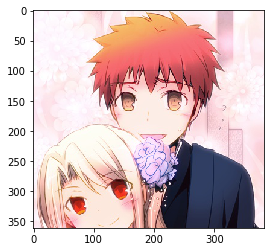

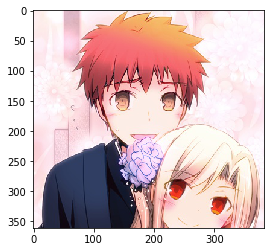

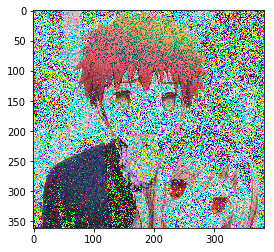

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
import chainer
from chainer.datasets import TransformDataset
from PIL import Image
import train_dcgan
import numpy as np

train_txt = 'train.txt'
#train_txt = ['../anime_face/detected_02/020219_黒銀3日目東あ-24a/23332493_p0_0.jpg']

#train = train_dcgan.PreprocessedDataset(paths=train_txt, root='./')
#train_t = TransformDataset(train, train_dcgan.transform)
train = chainer.datasets.ImageDataset(paths=train_txt, root='./')
train_t = train_dcgan.PreprocessedDataset(paths=train_txt, root='./')


data_size = train.__len__()
print(data_size)

i = np.random.randint(data_size)

im = train.get_example(i).transpose(1,2,0)
tmp = train_t.get_example(i).transpose(1,2,0)
im_t = tmp * 128. + 128.
im_n = (tmp + 0.2 * np.random.randn(*tmp.shape)) * 128.0 + 128.0

print(im.shape)
print(im[0,0,:])
print(type(im[0,0,0]))
print(type(im_t[0,0,0]))

plt.imshow(im.astype(np.uint8))
plt.show()
plt.imshow(im_t.astype(np.uint8))
plt.show()
plt.imshow(im_n.astype(np.uint8))

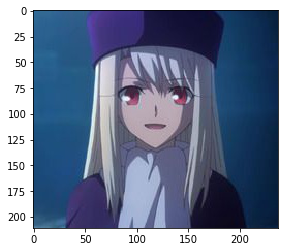

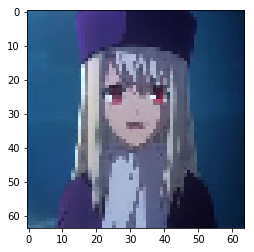

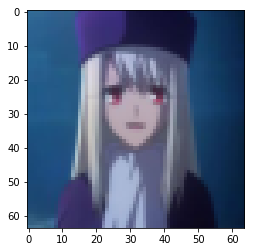

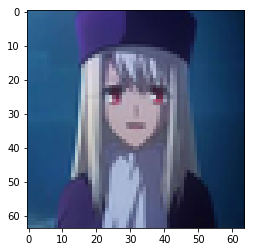

In [21]:
im = Image.open('../anime_face/detected_illya/tmp/00000_0.jpg', "r")
#im = Image.open('/tmp/dcgan/058607_015470_しぴー/000_65823572_p0_0.jpg', "r")


im2 = np.array(im)
#print(type(im2[0,0,0]))
plt.imshow(np.array(im2))
plt.show()

size = 64

im_no = im.resize((size, size))
plt.imshow(im_no)
plt.show()

im_bi = im.resize((size,size),Image.BILINEAR)
plt.imshow(im_bi)
plt.show()

im_lan = im.resize((size,size),Image.LANCZOS) # LANCZOS と ANTIALIAS は同じ
plt.imshow(im_lan)
plt.show()
    